# Corona Virus Cases Analysis 2020-2021 


## A. Confirmed Cases

1. **[Total confirmed cases in the world](#a)**
2. **[Per day rise in confirmed cases in the world](#b)**
3. **[Top 5 Countries with the maximum confirmed cases till date](#c)**
4. **[Side by side comparison of India, US and Brazil - Confirmed](#d)**


## B. Death Cases

1. **[Total deaths in the world](#e)**
2. **[Per day rise in confirmed deaths in the world](#f)**
3. **[Top 5 Countries with the maximum death cases till date](#g)**
4. **[Side by side comparison of India, US and Brazil - Deaths](#h)**


## C. Recoveries

1. **[Total recoveries in the world](#i)**
2. **[Per day rise in recoveries in the world](#j)**
3. **[Top 5 Countries with the maximum recoveries till date](#k)**
4. **[Side by side comparison of India, US and Brazil - Recoveries](#l)**


## D. Active Cases

1. **[Total active cases in the world](#m)**
2. **[World per day change in active cases](#n)**
3. **[Top 5 Countries with the maximum active cases till date](#nono)**
4. **[Side by side comparison of India, US and Brazil - Active](#o)** 


## **[E. Analyzing mortality rates, recovery rates and active ratios](#t)**

- Top 5 Countries with highest mortality rates
- Top 5 Countries with highest recovery rates
- Top 5 Countries with highest % of active cases

## **[F. Distribution of mortality,recovery and active cases within a country](#u)**


### Loading the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the data

In [2]:
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')
df_recoveries = pd.read_csv('time_series_covid19_recovered_global.csv')
df_latest = pd.read_csv('09-22-2020.csv')


In [3]:
df_confirmed.head(10)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,121344,121580,121866,122108,122311,122522,122717,122999,123272,123473
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13121,13148,13198,13232,13232,13282,13295,13316,13340,13363
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,25942,26168,26431,26652,26815,26993,27133,27284,27529,27921
5,NaN,Antigua and Barbuda,17.06080,-61.796400,0,0,0,0,0,0,...,1232,1232,1232,1232,1232,1232,1232,1232,1232,1232
6,NaN,Argentina,-38.41610,-63.616700,0,0,0,0,0,0,...,2905172,2928890,2954943,2977363,2993865,3005259,3021179,3047417,3071496,3095582
7,NaN,Armenia,40.06910,45.038200,0,0,0,0,0,0,...,214064,214872,215528,216064,216596,216863,217008,217407,217900,218325
8,Australian Capital Territory,Australia,-35.47350,149.012400,0,0,0,0,0,0,...,123,123,124,124,124,124,124,124,124,124
9,New South Wales,Australia,-33.86880,151.209300,0,0,0,0,3,4,...,5449,5464,5477,5481,5484,5489,5496,5506,5516,5521


In [4]:
df_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2598,2611,2618,2625,2631,2637,2642,2648,2654,2664
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2383,2386,2389,2394,2396,2397,2399,2402,2403,2406
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,3225,3234,3244,3253,3261,3270,3280,3289,3299,3307
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,124,125,125,125,125,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,587,591,594,596,600,602,603,609,618,622


In [5]:
df_recoveries.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,52794,52974,53103,53206,53272,53391,53391,53694,53750,53961
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,107163,107887,108606,109338,110172,110920,111792,112626,113468,114362
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,84598,84745,84940,85108,85249,85398,85534,85693,85869,86007
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,12561,12590,12650,12684,12684,12753,12793,12818,12884,12900
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,23341,23584,23606,23876,23913,23913,24190,24190,24492,24503


In [6]:
df_latest.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-09-23 04:23:00,33.93911,67.709953,39096,1447,32576,5075.0,Afghanistan,100.430686,3.696030
1,NaN,NaN,NaN,Albania,2020-09-23 04:23:00,41.15330,20.168300,12666,367,7042,5257.0,Albania,440.127876,2.897521
2,NaN,NaN,NaN,Algeria,2020-09-23 04:23:00,28.03390,1.659600,50214,1689,35307,13218.0,Algeria,114.510389,3.363604
3,NaN,NaN,NaN,Andorra,2020-09-23 04:23:00,42.50630,1.521800,1681,53,1199,429.0,Andorra,2175.629328,3.152885
4,NaN,NaN,NaN,Angola,2020-09-23 04:23:00,-11.20270,17.873900,4236,155,1462,2619.0,Angola,12.888594,3.659112


In [7]:
# storing all the dates in a variable 'dates'
dates = df_confirmed.columns[4:]
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '4/27/21', '4/28/21', '4/29/21', '4/30/21', '5/1/21', '5/2/21',
       '5/3/21', '5/4/21', '5/5/21', '5/6/21'],
      dtype='object', length=471)

In [8]:
#calculating number of days since 22 January 2020
days_since = [i for i in range(len(dates))]
#days_since

In [9]:
sns.set_style('darkgrid')


<a id="a"> </a>
### Total confirmed cases in the world

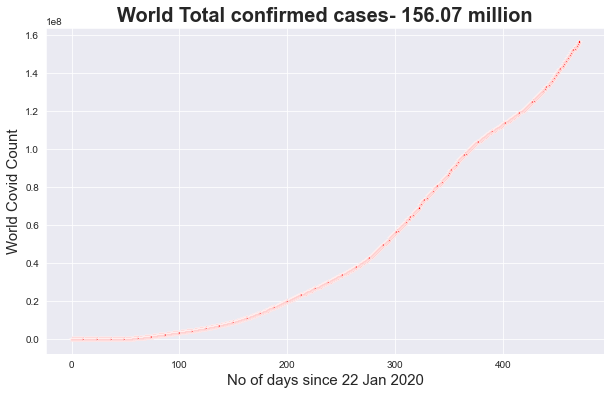

In [10]:
total_cases = []
for i in dates:
    total_cases.append(df_confirmed[i].sum())
    

plt.figure(figsize = (10,6))
sns.lineplot(x=days_since,y=total_cases,color='r',marker='*')
plt.title('World Total confirmed cases- {:.2f} million'.format(total_cases[-1]/10**6),fontweight='bold',size=20)
plt.xlabel('No of days since 22 Jan 2020',size=15)
plt.ylabel('World Covid Count',size=15)
plt.show()

<u id="b"> </u>
### Per day rise in confirmed cases in the world

In [11]:
#Creating a function for calculating per day increase of any feature. This takes list as an argument.

def per_day_rise(x):
    per_day_rise = []

    for i in range(len(x)):
        if i==0:
            per_day_rise.append(0)
        else:
            per_day_rise.append(x[i]-x[i-1])
    return per_day_rise
per=per_day_rise(total_cases)
#per

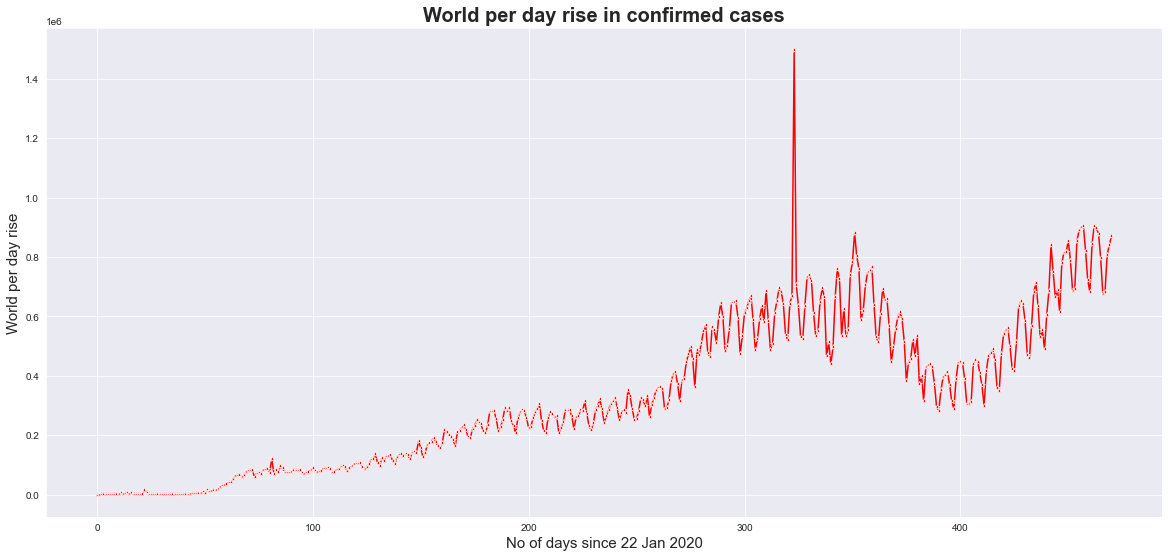

In [12]:
plt.figure(figsize = (20,9))
sns.lineplot(x=days_since,y=per,color='r',marker='*')
plt.title('World per day rise in confirmed cases',fontweight='bold',size=20)
plt.xlabel('No of days since 22 Jan 2020',size=15)
plt.ylabel('World per day rise',size=15)
plt.show()

In [13]:
dates[-1]
df_confirmed.iloc[:,[1,-1]]
df_confirmed.iloc[:,[1,-1]].sort_values(by=dates[-1],ascending =False)[:5].reset_index().drop('index',axis=1)


,Country/Region,5/6/21
0,US,32604810
1,India,21491598
2,Brazil,15003563
3,France,5679730
4,Turkey,4977982


<a id="c"> </a>
### Top 5 Countries with the maximum confirmed cases till date

In [14]:
top_5_con = df_confirmed.iloc[:,[1,-1]].sort_values(by=dates[-1],ascending =False)[:5]
top_5_con.columns = ['Country/Region','Total Confirmed']
top_5_con=top_5_con.reset_index().drop('index',axis=1)
top_5_con

,Country/Region,Total Confirmed
0,US,32604810
1,India,21491598
2,Brazil,15003563
3,France,5679730
4,Turkey,4977982


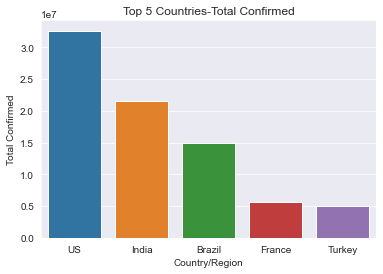

In [15]:
sns.barplot(x='Country/Region',y='Total Confirmed',data=top_5_con)
plt.title('Top 5 Countries-Total Confirmed')
plt.show()

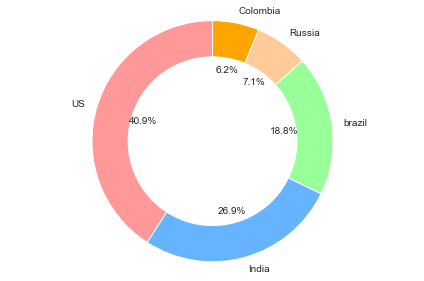

In [16]:
countries=[]
for i in range(0,5):
    countries.append(top_5_con['Total Confirmed'][i])
labels=['US','India','brazil','Russia','Colombia']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#FFA500']
 
fig1, ax1 = plt.subplots()
ax1.pie(countries, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [17]:
df_confirmed[df_confirmed['Country/Region']=='India'][dates].sum()
 

1/22/20           0
1/23/20           0
1/24/20           0
1/25/20           0
1/26/20           0
             ...   
5/2/21     19925517
5/3/21     20282833
5/4/21     20664979
5/5/21     21077410
5/6/21     21491598
Length: 471, dtype: int64

<a id="d"> </a>
### Confirmed Cases in India,US and Brazil - Total Vs. Per day

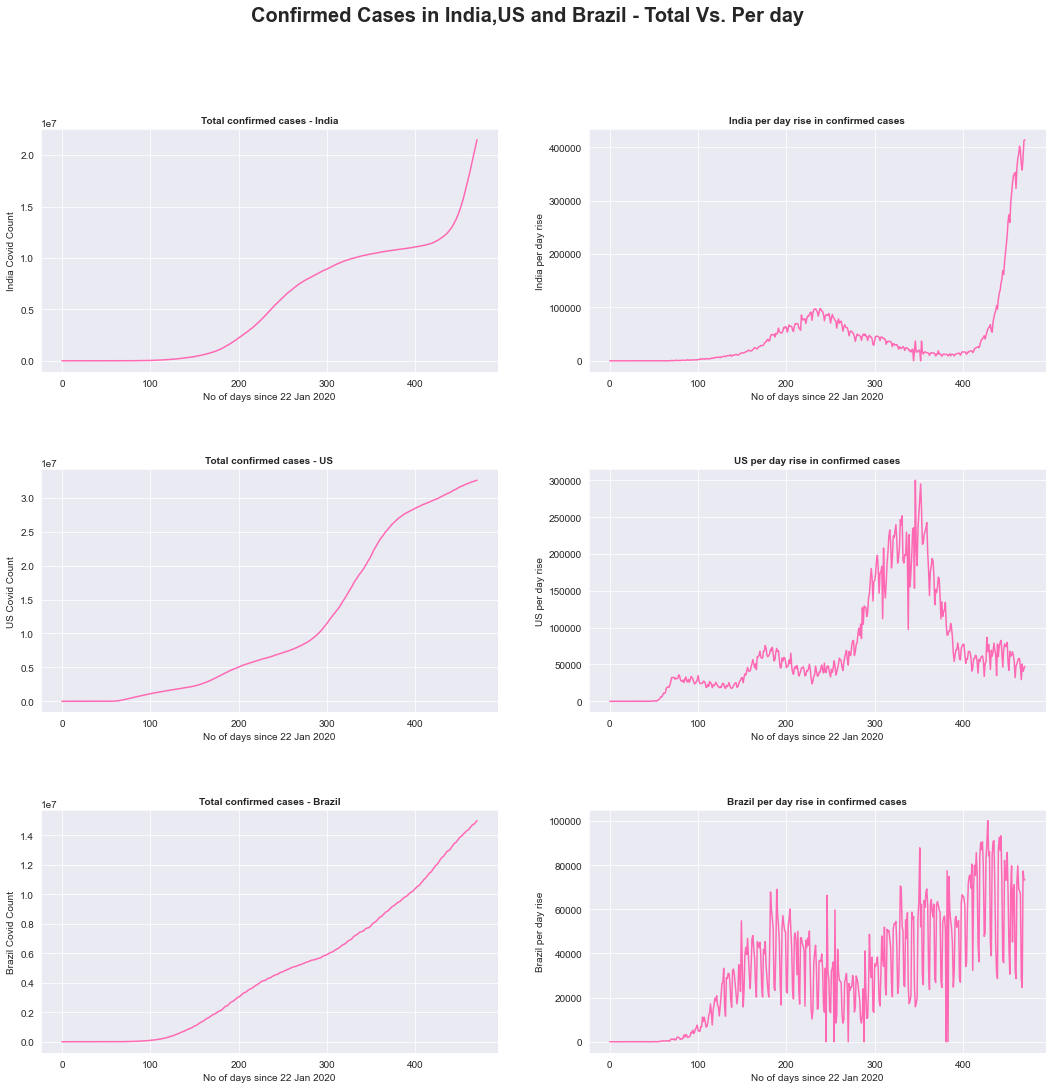

In [18]:
#Total cases and per day increase in India,Brazil and US since 22 Jan 2020

total_cases_India = []
for i in dates:
    total_cases_India.append(df_confirmed[df_confirmed['Country/Region']=='India'][i].sum())
    
total_cases_US = []
for i in dates:
    total_cases_US.append(df_confirmed[df_confirmed['Country/Region']=='US'][i].sum())
    

total_cases_Brazil = []
for i in dates:
    total_cases_Brazil.append(df_confirmed[df_confirmed['Country/Region']=='Brazil'][i].sum())
    
fig,ax = plt.subplots(3,2,figsize=(18,17))
fig.suptitle('Confirmed Cases in India,US and Brazil - Total Vs. Per day',fontweight='bold',fontsize=20)   


sns.lineplot(x=days_since,y=total_cases_India,color='hotpink',palette="ch:2.5,.25",ax= ax[0][0])
ax[0][0].set_title('Total confirmed cases - India',fontweight='bold',size=10)
ax[0][0].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[0][0].set_ylabel('India Covid Count',size=10)



sns.lineplot(x=days_since,y=per_day_rise(total_cases_India),color='hotpink',palette="ch:2.5,.25",ax=ax[0][1])
ax[0][1].set_title('India per day rise in confirmed cases',fontweight='bold',size=10)
ax[0][1].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[0][1].set_ylabel('India per day rise',size=10)


sns.lineplot(x=days_since,y=total_cases_US,color='hotpink',palette="ch:2.5,.25",ax= ax[1][0])
ax[1][0].set_title('Total confirmed cases - US',fontweight='bold',size=10)
ax[1][0].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[1][0].set_ylabel('US Covid Count',size=10)



sns.lineplot(x=days_since,y=per_day_rise(total_cases_US),color='hotpink',palette="ch:2.5,.25",ax=ax[1][1])
ax[1][1].set_title('US per day rise in confirmed cases',fontweight='bold',size=10)
ax[1][1].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[1][1].set_ylabel('US per day rise',size=10)



sns.lineplot(x=days_since,y=total_cases_Brazil,color='hotpink',palette="ch:2.5,.25",ax= ax[2][0])
ax[2][0].set_title('Total confirmed cases - Brazil',fontweight='bold',size=10)
ax[2][0].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[2][0].set_ylabel('Brazil Covid Count',size=10)


sns.lineplot(x=days_since,y=per_day_rise(total_cases_Brazil),color='hotpink',palette="ch:2.5,.25",ax=ax[2][1])
ax[2][1].set_title('Brazil per day rise in confirmed cases',fontweight='bold',size=10)
ax[2][1].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[2][1].set_ylabel('Brazil per day rise',size=10)

plt.subplots_adjust(hspace=0.4)

plt.show()

In [19]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,59225,59370,59576,59745,59939,60122,60300,60563,60797,61162
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130736,130859,130977,131085,131185,131238,131276,131327,131419,131510
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,121344,121580,121866,122108,122311,122522,122717,122999,123272,123473
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13121,13148,13198,13232,13232,13282,13295,13316,13340,13363
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,25942,26168,26431,26652,26815,26993,27133,27284,27529,27921


<a id="e"> </a>
### Total deaths in the world

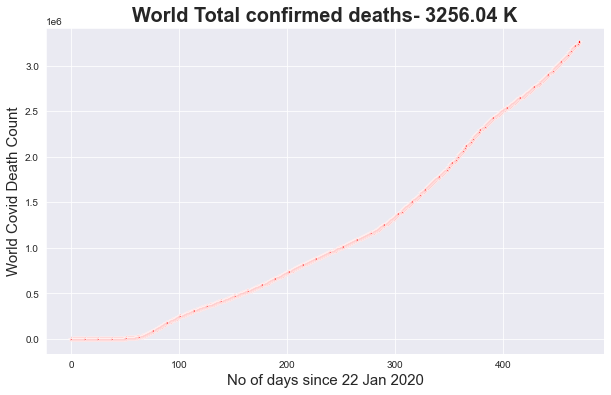

In [20]:
total_deaths = []
for i in dates:
    total_deaths.append(df_deaths[i].sum())


plt.figure(figsize = (10,6))
sns.lineplot(x=days_since,y=total_deaths,color='#FF0000',marker='*')
#dividing total_death last sum value by 1000
plt.title('World Total confirmed deaths- {:.2f} K'.format(total_deaths[-1]/1000),fontweight='bold',size=20)
plt.xlabel('No of days since 22 Jan 2020',size=15)
plt.ylabel('World Covid Death Count',size=15)
plt.show()

<a id="f"> </a>
### Per day rise in confirmed deaths in the world

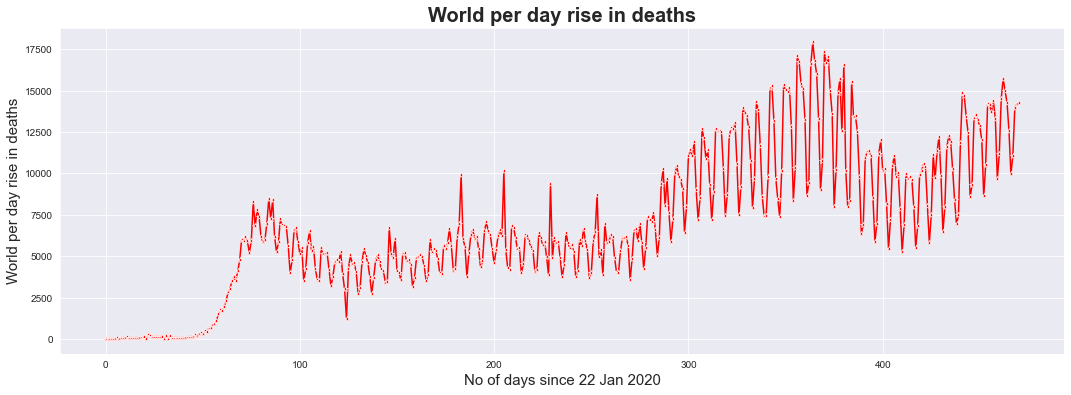

In [87]:
plt.figure(figsize = (18,6))
sns.lineplot(x=days_since,y=per_day_rise(total_deaths),color='r',marker='*')
plt.title('World per day rise in deaths',fontweight='bold',size=20)
plt.xlabel('No of days since 22 Jan 2020',size=15)
plt.ylabel('World per day rise in deaths',size=15)
plt.show()

<a id="g"> </a>
### Top 5 Countries with the maximum death cases till date

In [22]:
top_5_death = df_deaths.iloc[:,[1,-1]].sort_values(by=dates[-1],ascending =False)[:5]
top_5_death.columns = ['Country/Region','Total Deaths']
top_5_death=top_5_death.reset_index().drop('index',axis=1)
top_5_death

,Country/Region,Total Deaths
0,US,580064
1,Brazil,416949
2,India,234083
3,Mexico,218173
4,United Kingdom,127583


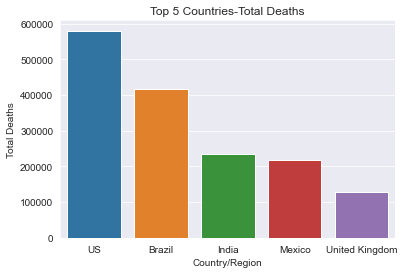

In [23]:
sns.barplot(x='Country/Region',y='Total Deaths',data=top_5_death)
plt.title('Top 5 Countries-Total Deaths')
plt.show()

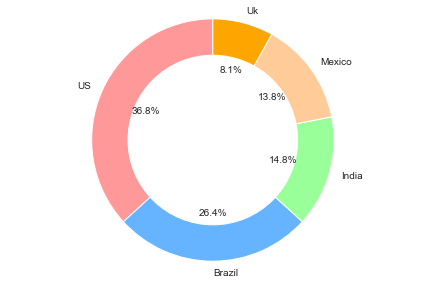

In [24]:
count_death=[]
for i in range(0,5):
    count_death.append(top_5_death['Total Deaths'][i])
labels=['US','Brazil','India','Mexico','Uk']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#FFA500']
 
fig1, ax1 = plt.subplots()
ax1.pie(count_death, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<a id="h"> </a>
### Death Cases in India,US and Brazil - Total Vs. Per day

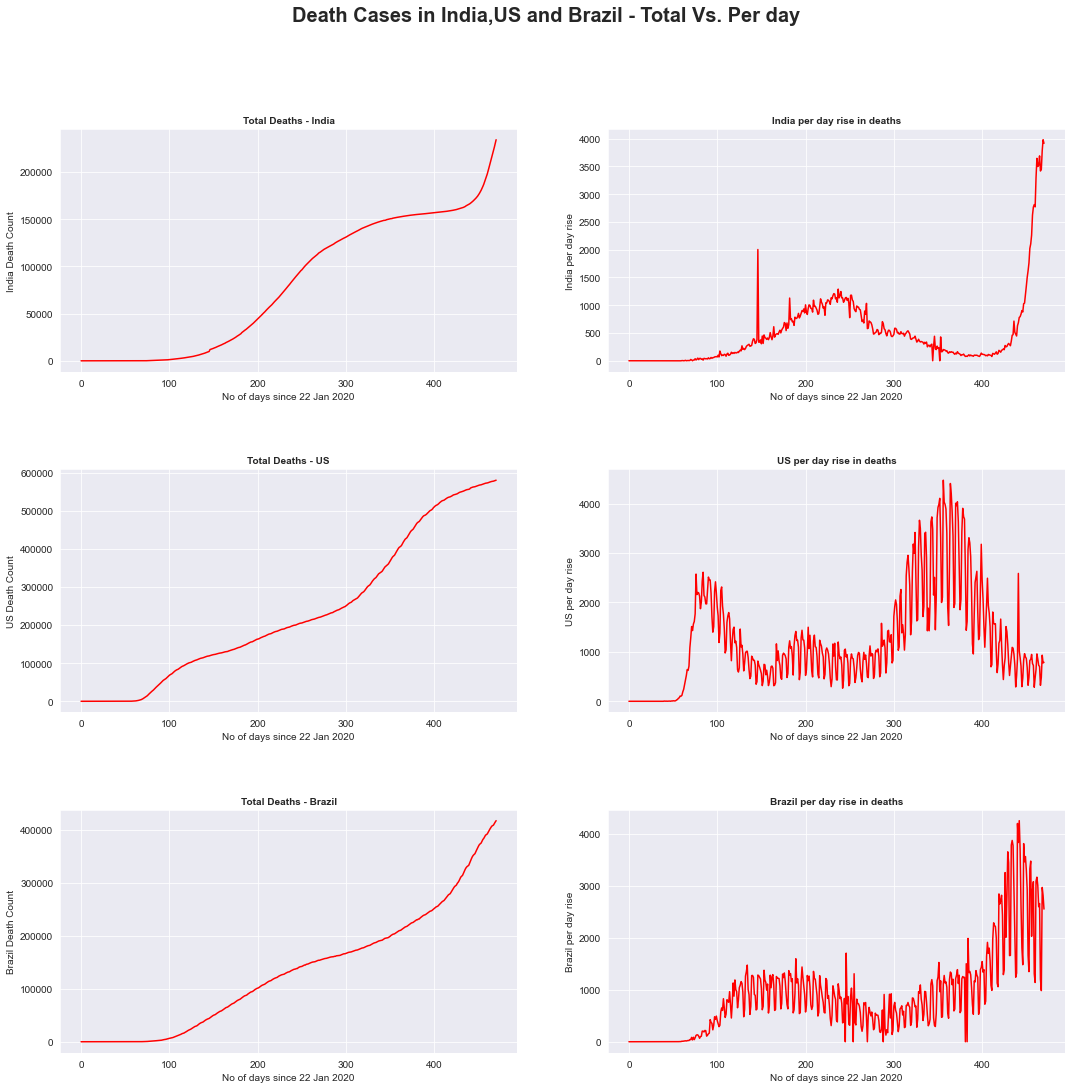

In [25]:
#Total deaths and per day increase in India,Brazil and US since 22 Jan 2020

total_deaths_India = []
for i in dates:
    total_deaths_India.append(df_deaths[df_deaths['Country/Region']=='India'][i].sum())
    
total_deaths_US = []
for i in dates:
    total_deaths_US.append(df_deaths[df_deaths['Country/Region']=='US'][i].sum())
    

total_deaths_Brazil = []
for i in dates:
    total_deaths_Brazil.append(df_deaths[df_deaths['Country/Region']=='Brazil'][i].sum())
    

fig,ax = plt.subplots(3,2,figsize=(18,17))
fig.suptitle('Death Cases in India,US and Brazil - Total Vs. Per day',fontweight='bold',fontsize=20)    


sns.lineplot(x=days_since,y=total_deaths_India,color='red',palette="ch:2.5,.25",ax= ax[0][0])
ax[0][0].set_title('Total Deaths - India',fontweight='bold',size=10)
ax[0][0].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[0][0].set_ylabel('India Death Count',size=10)



sns.lineplot(x=days_since,y=per_day_rise(total_deaths_India),color='red',palette="ch:2.5,.25",ax=ax[0][1])
ax[0][1].set_title('India per day rise in deaths',fontweight='bold',size=10)
ax[0][1].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[0][1].set_ylabel('India per day rise',size=10)


sns.lineplot(x=days_since,y=total_deaths_US,color='red',palette="ch:2.5,.25",ax= ax[1][0])
ax[1][0].set_title('Total Deaths - US',fontweight='bold',size=10)
ax[1][0].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[1][0].set_ylabel('US Death Count',size=10)



sns.lineplot(x=days_since,y=per_day_rise(total_deaths_US),color='red',palette="ch:2.5,.25",ax=ax[1][1])
ax[1][1].set_title('US per day rise in deaths',fontweight='bold',size=10)
ax[1][1].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[1][1].set_ylabel('US per day rise',size=10)



sns.lineplot(x=days_since,y=total_deaths_Brazil,color='red',palette="ch:2.5,.25",ax= ax[2][0])
ax[2][0].set_title('Total Deaths - Brazil',fontweight='bold',size=10)
ax[2][0].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[2][0].set_ylabel('Brazil Death Count',size=10)


sns.lineplot(x=days_since,y=per_day_rise(total_deaths_Brazil),color='red',palette="ch:2.5,.25",ax=ax[2][1])
ax[2][1].set_title('Brazil per day rise in deaths',fontweight='bold',size=10)
ax[2][1].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[2][1].set_ylabel('Brazil per day rise',size=10)

plt.subplots_adjust(hspace=0.4)

plt.show()

<a id="i"> </a>
### Total recoveries in the world

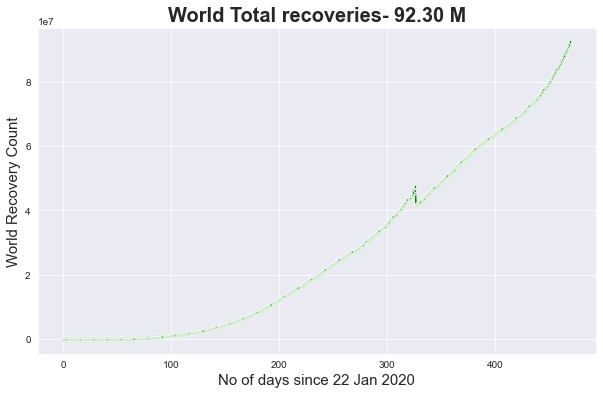

In [26]:
#Recoveries
total_rec = []
for i in dates:
    total_rec.append(df_recoveries[i].sum())
    
plt.figure(figsize = (10,6))
sns.lineplot(x=days_since,y=total_rec,color='g',marker='*')
plt.title('World Total recoveries- {:.2f} M'.format(total_rec[-1]/10**6),fontweight='bold',size=20)
plt.xlabel('No of days since 22 Jan 2020',size=15)
plt.ylabel('World Recovery Count',size=15)
plt.show()

<a id="j"> </a>
### Per day rise in recoveries in the world

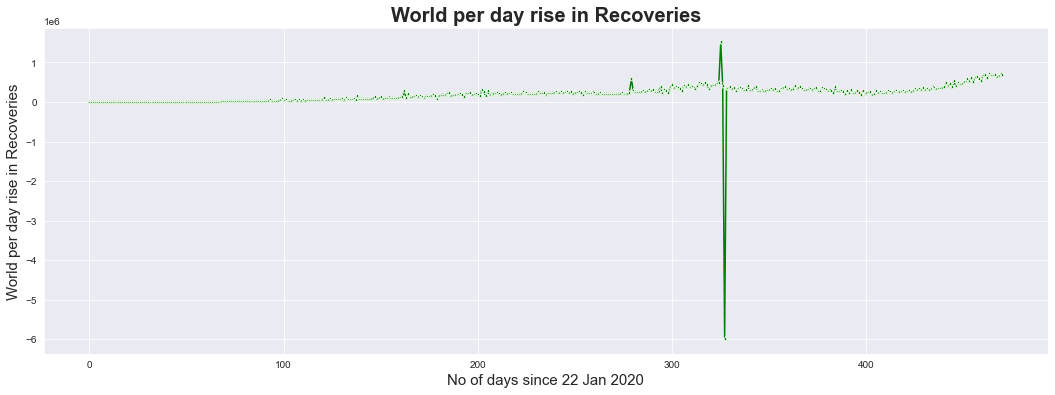

In [88]:
plt.figure(figsize = (18,6))
sns.lineplot(x=days_since,y=per_day_rise(total_rec),color='g',marker='*')
plt.title('World per day rise in Recoveries',fontweight='bold',size=20)
plt.xlabel('No of days since 22 Jan 2020',size=15)
plt.ylabel('World per day rise in Recoveries',size=15)
plt.show()

<a id="k"> </a>
### Top 5 Countries with the maximum recoveries till date

In [28]:
top_5_rec = df_recoveries.iloc[:,[1,-1]].sort_values(by=dates[-1],ascending =False)[:5]
top_5_rec.columns = ['Country/Region','Total Recoveries']
top_5_rec=top_5_rec.reset_index().drop('index',axis=1)
top_5_rec

,Country/Region,Total Recoveries
0,India,17612351
1,Brazil,13285589
2,Turkey,4626799
3,Russia,4421329
4,Italy,3557133


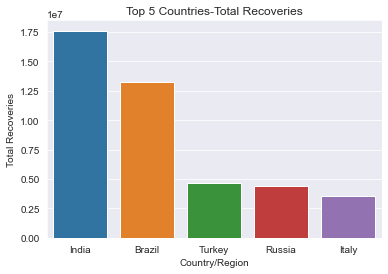

In [29]:
sns.barplot(x='Country/Region',y='Total Recoveries',data=top_5_rec)
plt.title('Top 5 Countries-Total Recoveries')
plt.show()

<a id="l"> </a>
### Recoveries in India,US and Brazil - Total Vs. Per day

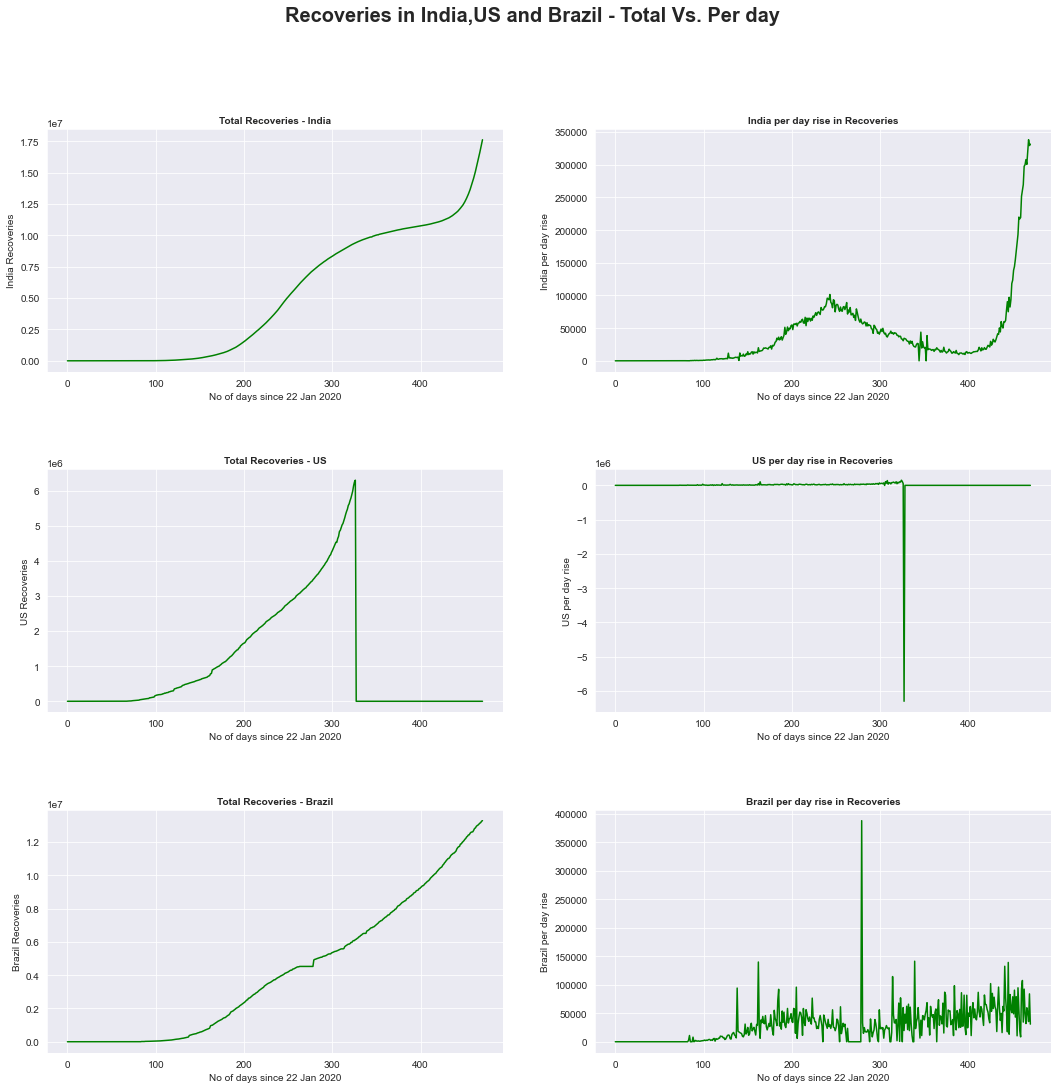

In [30]:
#Total recoveries and per day increase in India,Brazil and US since 22 Jan 2020

total_rec_India = []
for i in dates:
    total_rec_India.append(df_recoveries[df_recoveries['Country/Region']=='India'][i].sum())
    
total_rec_US = []
for i in dates:
    total_rec_US.append(df_recoveries[df_recoveries['Country/Region']=='US'][i].sum())
    

total_rec_Brazil = []
for i in dates:
    total_rec_Brazil.append(df_recoveries[df_recoveries['Country/Region']=='Brazil'][i].sum())
    

fig,ax = plt.subplots(3,2,figsize=(18,17)) 
fig.suptitle('Recoveries in India,US and Brazil - Total Vs. Per day',fontweight='bold',fontsize=20)
sns.lineplot(x=days_since,y=total_rec_India,color='g',palette="ch:2.5,.25",ax= ax[0][0])
ax[0][0].set_title('Total Recoveries - India',fontweight='bold',size=10)
ax[0][0].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[0][0].set_ylabel('India Recoveries',size=10)



sns.lineplot(x=days_since,y=per_day_rise(total_rec_India),color='g',palette="ch:2.5,.25",ax=ax[0][1])
ax[0][1].set_title('India per day rise in Recoveries',fontweight='bold',size=10)
ax[0][1].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[0][1].set_ylabel('India per day rise',size=10)


sns.lineplot(x=days_since,y=total_rec_US,color='g',palette="ch:2.5,.25",ax= ax[1][0])
ax[1][0].set_title('Total Recoveries - US',fontweight='bold',size=10)
ax[1][0].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[1][0].set_ylabel('US Recoveries',size=10)



sns.lineplot(x=days_since,y=per_day_rise(total_rec_US),color='g',palette="ch:2.5,.25",ax=ax[1][1])
ax[1][1].set_title('US per day rise in Recoveries',fontweight='bold',size=10)
ax[1][1].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[1][1].set_ylabel('US per day rise',size=10)



sns.lineplot(x=days_since,y=total_rec_Brazil,color='g',palette="ch:2.5,.25",ax= ax[2][0])
ax[2][0].set_title('Total Recoveries - Brazil',fontweight='bold',size=10)
ax[2][0].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[2][0].set_ylabel('Brazil Recoveries',size=10)


sns.lineplot(x=days_since,y=per_day_rise(total_rec_Brazil),color='g',palette="ch:2.5,.25",ax=ax[2][1])
ax[2][1].set_title('Brazil per day rise in Recoveries',fontweight='bold',size=10)
ax[2][1].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[2][1].set_ylabel('Brazil per day rise',size=10)

plt.subplots_adjust(hspace=0.4)

plt.show()

<a id="m"> </a>
### Total active cases in the world

<function matplotlib.pyplot.show(close=None, block=None)>

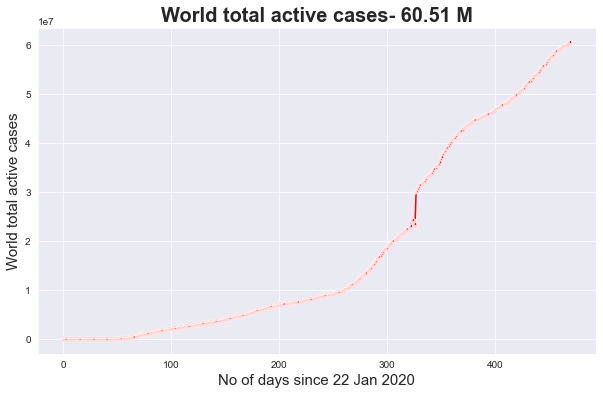

In [31]:
total_active = np.array(total_cases) - np.array(total_deaths) - np.array(total_rec)



plt.figure(figsize = (10,6))
sns.lineplot(x=days_since,y=total_active,color='red',marker='*')
plt.title('World total active cases- {:.2f} M'.format(total_active[-1]/10**6),fontweight='bold',size=20)
plt.xlabel('No of days since 22 Jan 2020',size=15)
plt.ylabel('World total active cases',size=15)
plt.show

<a id="n"> </a>
### World per day change in active cases

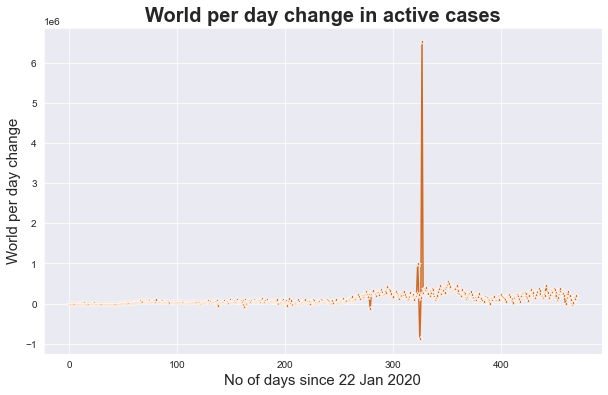

In [32]:
plt.figure(figsize = (10,6))
sns.lineplot(x=days_since,y=per_day_rise(total_active),color='chocolate',marker='*')#calling perdayfunction to check
plt.title('World per day change in active cases',fontweight='bold',size=20)
plt.xlabel('No of days since 22 Jan 2020',size=15)
plt.ylabel('World per day change',size=15)
plt.show()

<a id="nono"> </a>
### Top 5 Countries with the maximum active cases till date

In [33]:
active= []
country = []
for i in df_recoveries['Country/Region'].unique():
    active.append(df_confirmed[df_confirmed['Country/Region']==i].iloc[:,-1].sum() - df_recoveries[df_recoveries['Country/Region']==i].iloc[:,-1].sum()-df_deaths[df_deaths['Country/Region']==i].iloc[:,-1].sum())
    country.append(i)

[('US', 32024746), ('France', 5314899), ('United Kingdom', 4301458), ('India', 3645164), ('Spain', 3330120)]
[('US', 'France', 'United Kingdom', 'India', 'Spain'), (32024746, 5314899, 4301458, 3645164, 3330120)]


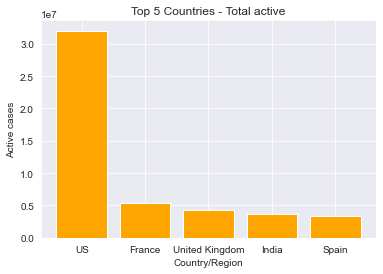

In [34]:
top_5_act = (sorted((zip(country,active)),key=lambda x:x[1],reverse=True)[0:5])
print(top_5_act)
top_5_act = list(zip(*top_5_act))
print(top_5_act)
plt.bar(x=top_5_act[0],height=top_5_act[1],color='orange')
plt.xlabel('Country/Region')
plt.ylabel('Active cases')
plt.title('Top 5 Countries - Total active')
plt.show()

<a id="o"> </a>
### Active Cases in India, US and Brazil - Total Vs. Per day

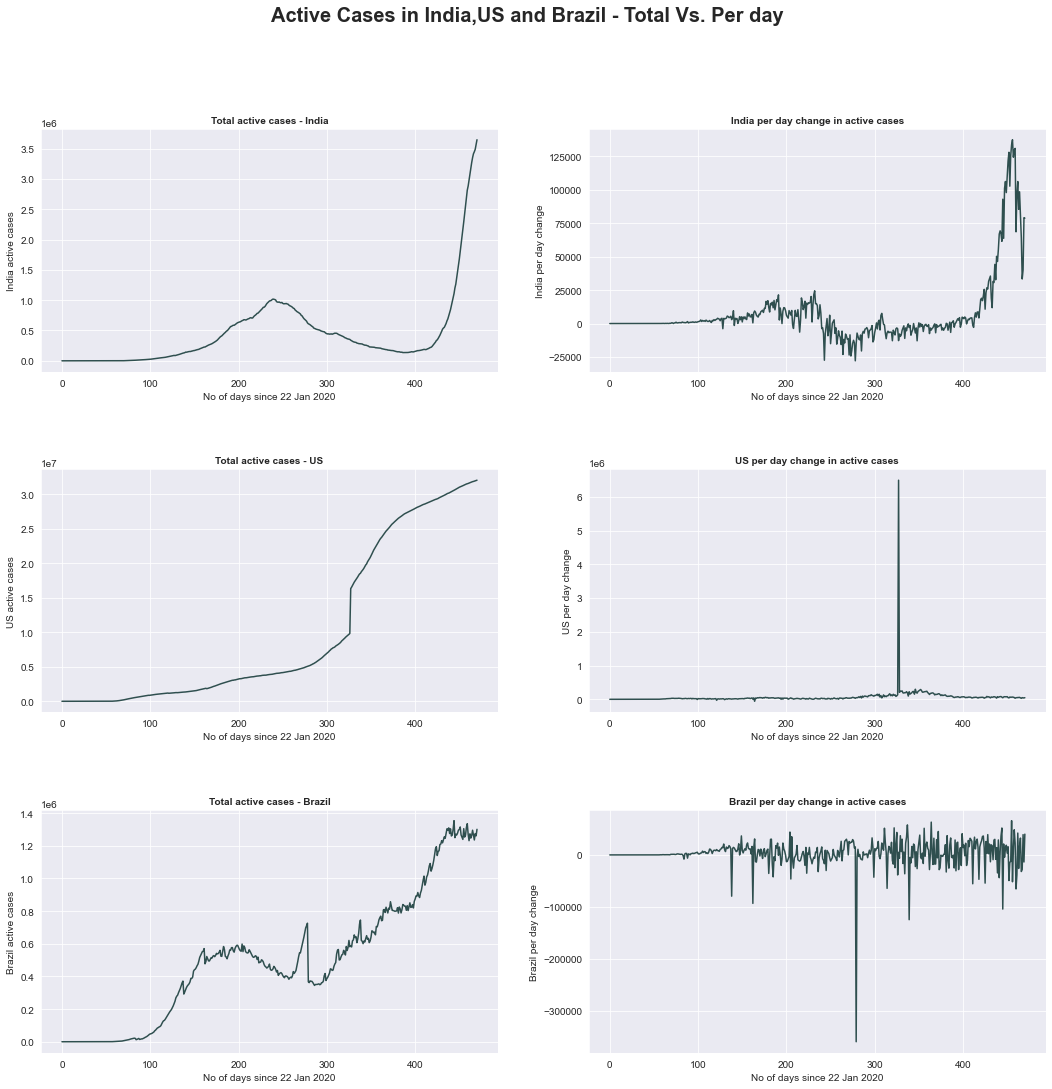

In [35]:
#Total active and per day change in India,Brazil and US since 22 Jan 2020

total_act_India = np.array(total_cases_India) - np.array(total_rec_India)-np.array(total_deaths_India)

total_act_US = np.array(total_cases_US) - np.array(total_rec_US)-np.array(total_deaths_US)

total_act_Brazil = np.array(total_cases_Brazil) - np.array(total_rec_Brazil)-np.array(total_deaths_Brazil)
    
fig,ax = plt.subplots(3,2,figsize=(18,17))   
fig.suptitle('Active Cases in India,US and Brazil - Total Vs. Per day',fontweight='bold',fontsize=20)

sns.lineplot(x=days_since,y=total_act_India,color='darkslategray',palette="ch:2.5,.25",ax= ax[0][0])
ax[0][0].set_title('Total active cases - India',fontweight='bold',size=10)
ax[0][0].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[0][0].set_ylabel('India active cases',size=10)



sns.lineplot(x=days_since,y=per_day_rise(total_act_India),color='darkslategray',palette="ch:2.5,.25",ax=ax[0][1])
ax[0][1].set_title('India per day change in active cases',fontweight='bold',size=10)
ax[0][1].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[0][1].set_ylabel('India per day change',size=10)


sns.lineplot(x=days_since,y=total_act_US,color='darkslategray',palette="ch:2.5,.25",ax= ax[1][0])
ax[1][0].set_title('Total active cases - US',fontweight='bold',size=10)
ax[1][0].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[1][0].set_ylabel('US active cases',size=10)



sns.lineplot(x=days_since,y=per_day_rise(total_act_US),color='darkslategray',palette="ch:2.5,.25",ax=ax[1][1])
ax[1][1].set_title('US per day change in active cases',fontweight='bold',size=10)
ax[1][1].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[1][1].set_ylabel('US per day change',size=10)



sns.lineplot(x=days_since,y=total_act_Brazil,color='darkslategray',palette="ch:2.5,.25",ax= ax[2][0])
ax[2][0].set_title('Total active cases - Brazil',fontweight='bold',size=10)
ax[2][0].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[2][0].set_ylabel('Brazil active cases',size=10)


sns.lineplot(x=days_since,y=per_day_rise(total_act_Brazil),color='darkslategray',palette="ch:2.5,.25",ax=ax[2][1])
ax[2][1].set_title('Brazil per day change in active cases',fontweight='bold',size=10)
ax[2][1].set_xlabel('No of days since 22 Jan 2020',size=10)
ax[2][1].set_ylabel('Brazil per day change',size=10)

plt.subplots_adjust(hspace=0.4)

plt.show()

In [36]:
#Selecting Countries for Visualization

top_10 = df_confirmed.iloc[:,[1,-1]].sort_values(by=dates[-1],ascending =False)[:5]
top_10.columns = ['Country/Region','Total Confirmed']
top_10=top_10.reset_index().drop('index',axis=1)
countries= top_10['Country/Region'].to_list()

<a id="t"> </a>
### Analyzing mortality rates, death rates and active ratios
- Top 5 Countries with highest mortality rates
- Top 5 Countries with highest recovery rates
- Top 5 Countries with highest % of active cases

In [38]:
df_latest.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-09-23 04:23:00,33.93911,67.709953,39096,1447,32576,5075.0,Afghanistan,100.430686,3.696030
1,NaN,NaN,NaN,Albania,2020-09-23 04:23:00,41.15330,20.168300,12666,367,7042,5257.0,Albania,440.127876,2.897521
2,NaN,NaN,NaN,Algeria,2020-09-23 04:23:00,28.03390,1.659600,50214,1689,35307,13218.0,Algeria,114.510389,3.363604
3,NaN,NaN,NaN,Andorra,2020-09-23 04:23:00,42.50630,1.521800,1681,53,1199,429.0,Andorra,2175.629328,3.152885
4,NaN,NaN,NaN,Angola,2020-09-23 04:23:00,-11.20270,17.873900,4236,155,1462,2619.0,Angola,12.888594,3.659112


In [39]:
data = df_latest.groupby('Country_Region')[['Confirmed','Deaths','Recovered']].sum().reset_index()
data['Mortality %'] = (data['Deaths']/data['Confirmed'])*100
data['Recovery %'] = (data['Recovered']/data['Confirmed'])*100
data['Active %'] = ((data['Confirmed']-data['Recovered']-data['Deaths'])/data['Confirmed'])*100
data.head()

,Country_Region,Confirmed,Deaths,Recovered,Mortality %,Recovery %,Active %
0,Afghanistan,39096,1447,32576,3.701146,83.323102,12.975752
1,Albania,12666,367,7042,2.897521,55.597663,41.504816
2,Algeria,50214,1689,35307,3.363604,70.313060,26.323336
3,Andorra,1681,53,1199,3.152885,71.326591,25.520523
4,Angola,4236,155,1462,3.659112,34.513692,61.827195


In [40]:
# Top 5 Countries with highest mortality rates

mort = (data[['Country_Region','Mortality %']].nlargest(5,'Mortality %')).set_index('Country_Region')
mort['Mortality %'] = mort['Mortality %'] .values.round(2)
mort

,Mortality %
Country_Region,
Yemen,28.90
MS Zaandam,22.22
Italy,11.88
Mexico,10.54
United Kingdom,10.33


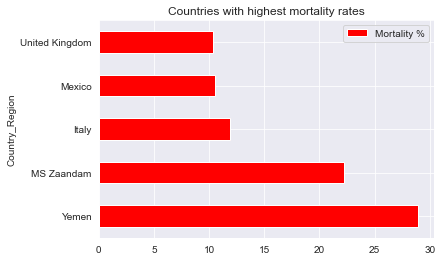

In [41]:
mort.plot(kind='barh',color='r')
plt.title('Countries with highest mortality rates')
plt.show()

In [42]:
# Top 5 Countries with highest recovery rates
rec = (data[['Country_Region','Recovery %']].nlargest(5,'Recovery %')).set_index('Country_Region')
rec['Recovery %'] = rec['Recovery %'].values.round(2)
rec

,Recovery %
Country_Region,
Grenada,100.00
Holy See,100.00
Saint Vincent and the Grenadines,100.00
Timor-Leste,100.00
Cambodia,99.64


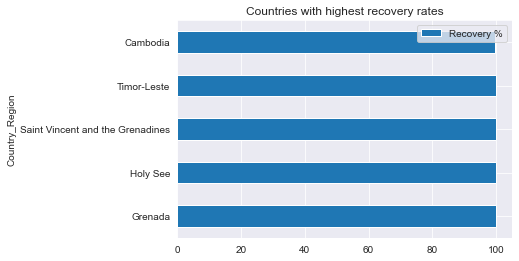

In [43]:
rec.plot(kind='barh')
plt.title('Countries with highest recovery rates')
plt.show()

In [44]:
# Top 5 Countries with highest % of active cases
act = (data[['Country_Region','Active %']].nlargest(5,'Active %')).set_index('Country_Region')
act['Active %'] = act['Active %'].values.round(2)
act

,Active %
Country_Region,
Serbia,97.75
Sweden,93.44
Netherlands,90.86
Greece,89.33
United Kingdom,89.12


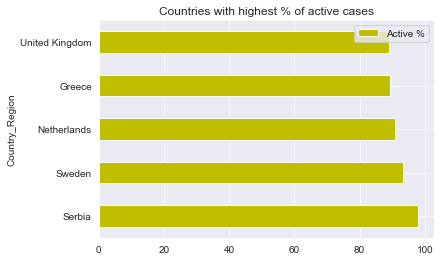

In [45]:
act.plot(kind='barh',color='y')
plt.title('Countries with highest % of active cases')
plt.show()

<a id="u"> </a>
### Country-wise distribution of mortality,recovery and active cases

In [46]:
data = data.set_index('Country_Region')

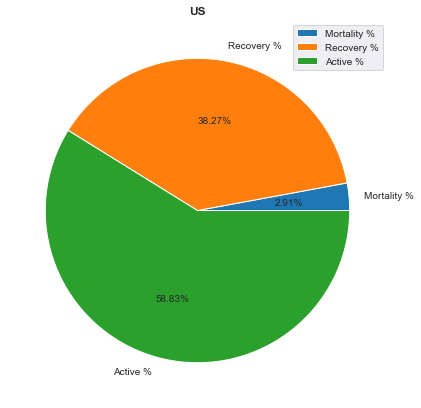

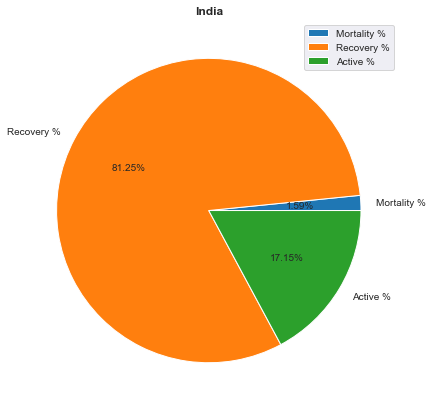

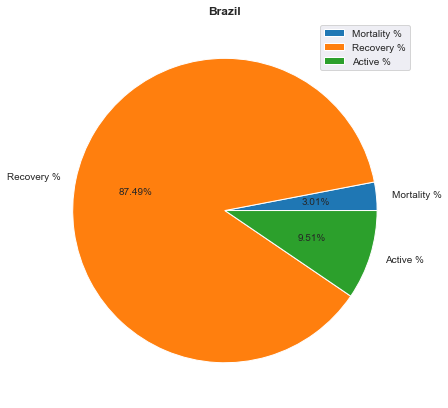

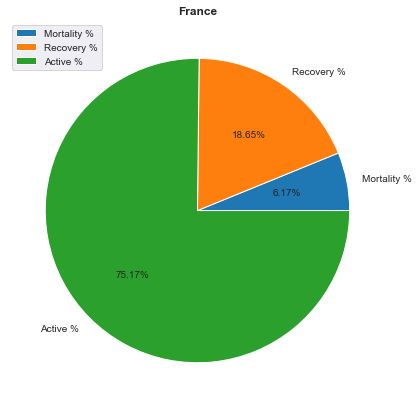

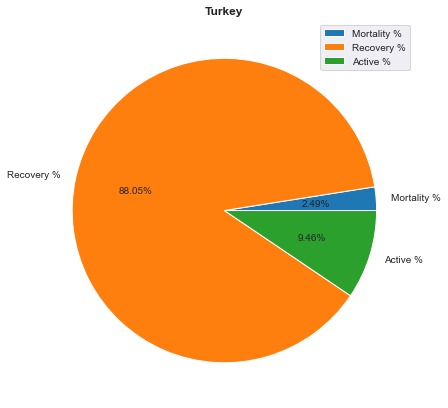

In [47]:
for i in countries:
    plt.figure(figsize=(7,7))
    plt.title(i,fontweight='bold')
    data.loc[i][['Mortality %','Recovery %','Active %']].plot(kind='pie',autopct='%1.2f%%')
    plt.legend()
    plt.ylabel('')
    plt.show()